<a href="https://colab.research.google.com/github/nicolascavalli/Forma-o-em-Dados/blob/main/Desafio5_DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Etapa 01) Lendo o arquivo e inspecionando os dados

In [1]:
#importando o dataset para o colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import locale

In [3]:
#Lendo o arquivo csv
df = pd.read_csv('data.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Analisando os dados numéricos com describe
df[['Quantity','UnitPrice']].describe(percentiles=[0.01, .1, .25, .5, .75, .9, .99])

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
1%,-2.000000,0.190000
10%,1.000000,0.630000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
90%,24.000000,7.950000


##Etapa 02) Valores faltantes na identificação do cliente

In [6]:
#Verificando os valores faltantes
df.isna().sum().to_frame('Valores Faltantes').join((df.isna().sum()/df.shape[0]*100).to_frame('Porcentagem Valores Faltantes')).sort_values('Valores Faltantes', ascending=False).style.format('{:.2f}', 'Porcentagem Valores Faltantes')


,Valores Faltantes,Porcentagem Valores Faltantes
CustomerID,135080,24.93
Description,1454,0.27
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


Utilizando o

```
df.isna().sum()
```
nota-se tanto a feature *Description* como a feature *CustomerID* estão com valores faltantes.


In [7]:
#Removendo os valores faltantes
df.dropna(inplace=True)

In [8]:
#Verificando se os valores foram eliminados
df.isna().sum().to_frame('Valores Faltantes').join((df.isna().sum()/df.shape[0]*100).to_frame('Porcentagem Valores Faltantes')).sort_values('Valores Faltantes', ascending=False).style.format('{:.2f}', 'Porcentagem Valores Faltantes')


,Valores Faltantes,Porcentagem Valores Faltantes
InvoiceNo,0,0.00
StockCode,0,0.00
Description,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,0,0.00
Country,0,0.00


Como podemos observar, os valores faltantes foram eliminados.

##Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

In [9]:
#Verificando se existem valores nulos ou negativos na coluna de preços unitários
df_preco = df.query('UnitPrice <= 0')
df_preco

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [10]:
df_preco.shape

(40, 8)

Analisando os valores acima, observamos que temos 40 linhas com valores nulos. Por isso iremos removê-los em seguida.

> Bloco com recuo



In [11]:
#Filtrando os valores maiores que 0
df = df.query('UnitPrice > 0')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
#Verificando se existem valores nulos ou negativos na coluna de Quantidade
df_qtd = df.query('Quantity <= 0')
df_qtd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
df_qtd.shape

(8905, 8)

Analisando os valores acima, observamos que temos 8905 linhas com valores nulos. Por isso iremos removê-los em seguida.

In [14]:
#Filtrando os valores maiores que 0
df = df.query('Quantity > 0')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


##Etapa 04) Verifique se existem linhas duplicadas

In [15]:
#Verificando se há linhas duplicadas
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [16]:
#Removendo os valores duplicados
df.drop_duplicates(inplace=True)

<ipython-input-16-141d9e961952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


##Etapa 05) Tipos de dados da coluna

In [18]:
#Utilizando df.info() para verificar os tipos de dados noavmente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [19]:
#Alterando o tipo de dado da coluna Custumor ID de float -> int
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-19-9f089d2a8801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [20]:
#Verificando se foi alterado
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  int64  
 7   Country      392692 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.0+ MB


In [21]:
#Alterando o tipo de dado da feature InvoiceDate de object/str -> datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-21-46866d84c98b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
#Verificando se a feature foi alterada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


##Etapa 06) Tratando os outliers

<Axes: >

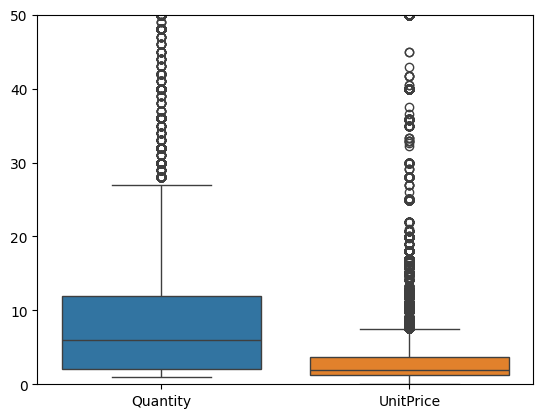

In [24]:
#Identificando os outliers com o gráfico boxplot
plt.ylim(0, 50)
sns.boxplot(df[['Quantity','UnitPrice']])

Notamos que pelo boxplot temos muitos outliers para as duas features. Para fins do desafio, vamos eliminar os outliers mais extremos, acima 10000 para *Quantity* e acima de 5000 para *UnityPrice*

In [25]:
df = df.query('Quantity <= 10000 and UnitPrice <= 5000')

In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


##Etapa 07) Crie uma coluna adicional

In [27]:
#Criando a coluna adicional 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-27-e3a514fa2384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


##Etapa 08) Última data

In [39]:
#Calculando a última data
last_date = df['InvoiceDate'].max()
last_date

Timestamp('2011-12-09 12:50:00')

##Etapa 09) Plotando gráficos

###Top 10 países com maior valor em vendas

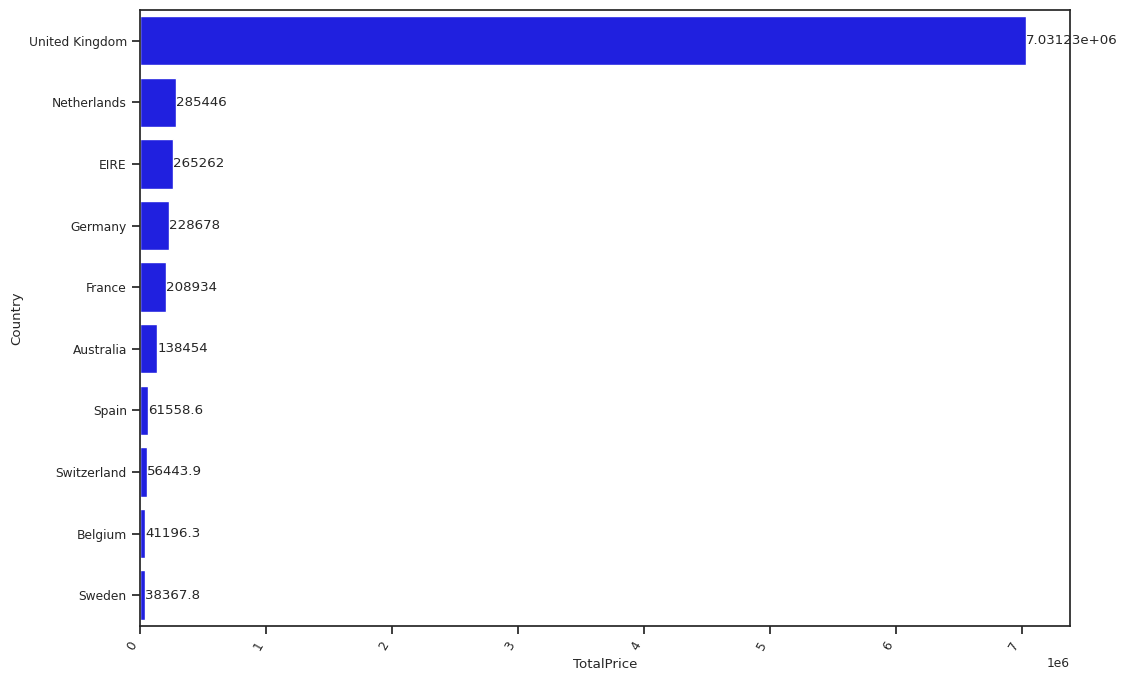

In [40]:
sns.set_theme(style='ticks', font_scale=.8, rc={'figure.figsize': (12, 8)})
ax = sns.barplot(df.groupby('Country')['TotalPrice'].agg('sum').sort_values(ascending=False).head(10), color='blue', orient='h')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60, ha='right');

###Top 10 produtos mais vendidos

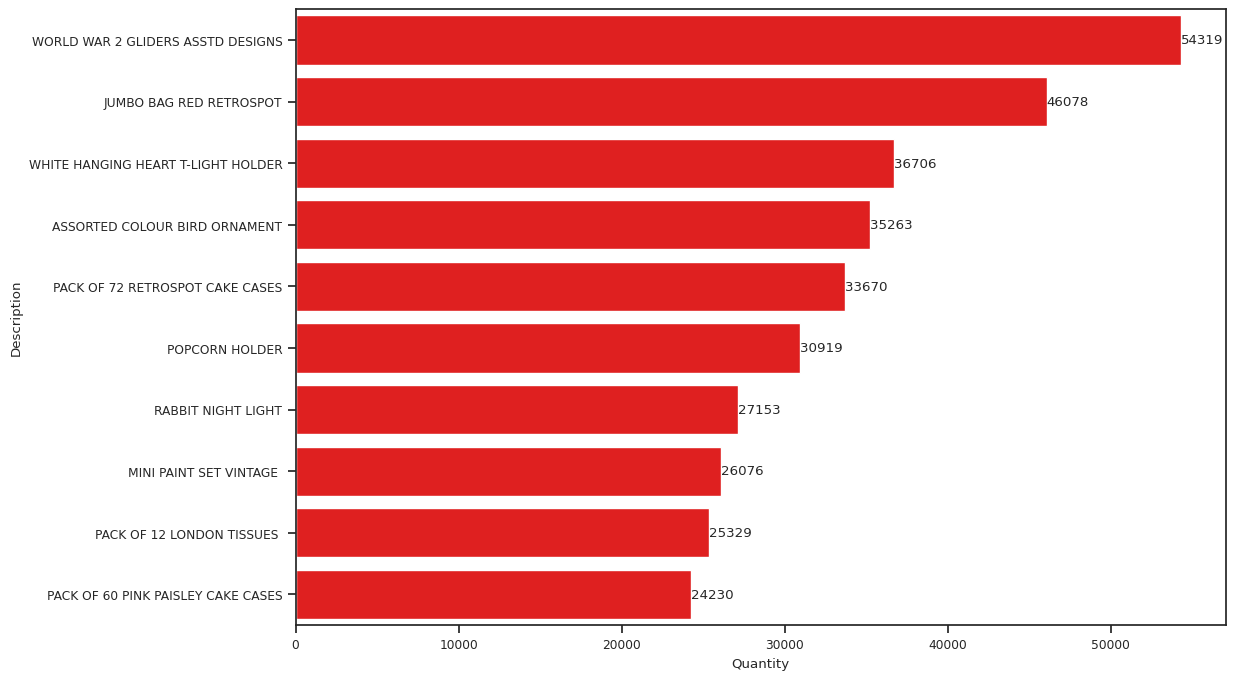

In [41]:
ax = sns.barplot(df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False).head(10), color='red', orient='h')
ax.bar_label(ax.containers[0]);

###Valor de venda total por mês

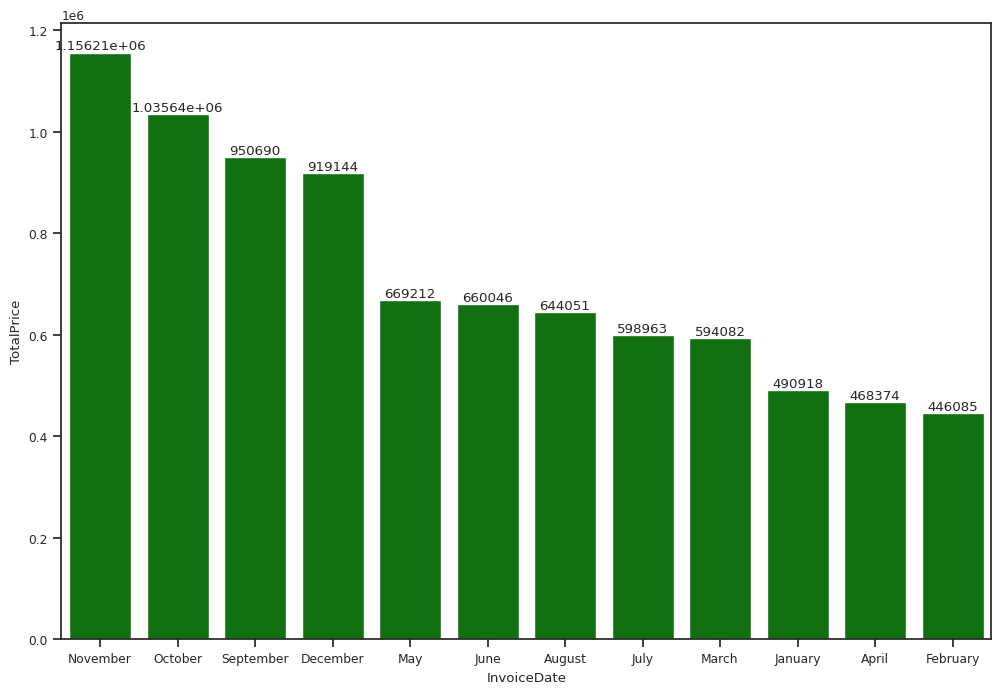

In [42]:
ax = sns.barplot(df.groupby(df['InvoiceDate'].dt.strftime('%B'))['TotalPrice'].agg('sum').sort_values(ascending=False), color='green')
ax.bar_label(ax.containers[0]);

###Valor de venda total por mês e por país (considere apenas os top 10)

<ipython-input-33-aff8ff968624>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  ax = sns.barplot(data=df.groupby([df['InvoiceDate'].dt.strftime('%B'), df['Country']])['TotalPrice'].agg('sum').sort_values(ascending=False).reset_index().head(10),x='InvoiceDate', y='TotalPrice', hue='Country', color='orange')


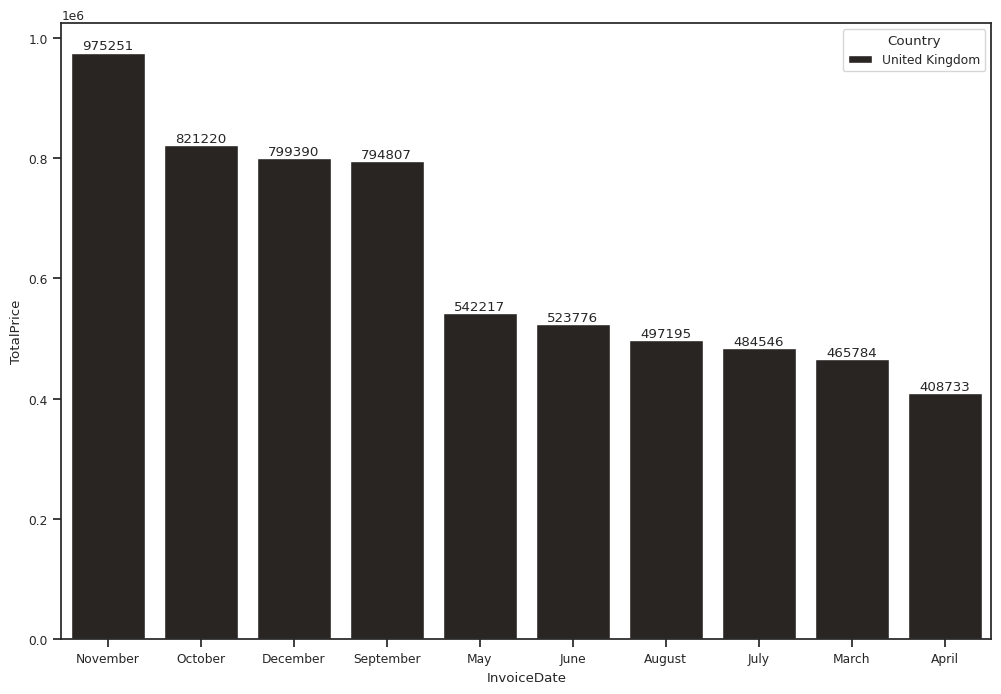

In [33]:
ax = sns.barplot(data=df.groupby([df['InvoiceDate'].dt.strftime('%B'), df['Country']])['TotalPrice'].agg('sum').sort_values(ascending=False).reset_index().head(10),x='InvoiceDate', y='TotalPrice', hue='Country', color='orange')
ax.bar_label(ax.containers[0]);

##Etapa 10) Cálculo do RFM

In [34]:
#Agrupando os dados por cliente e pedido/compra
grupo_pedido = df.groupby(['CustomerID', 'InvoiceNo']).agg({'TotalPrice':'sum', 'InvoiceDate':'max'}).reset_index()
grupo_pedido

,CustomerID,InvoiceNo,TotalPrice,InvoiceDate
0,12347,537626,711.79,2010-12-07 14:57:00
1,12347,542237,475.39,2011-01-26 14:30:00
2,12347,549222,636.25,2011-04-07 10:43:00
3,12347,556201,382.52,2011-06-09 13:01:00
4,12347,562032,584.91,2011-08-02 08:48:00
...,...,...,...,...
18524,18283,579673,220.31,2011-11-30 12:59:00
18525,18283,580872,208.00,2011-12-06 12:02:00
18526,18287,554065,765.28,2011-05-22 10:39:00
18527,18287,570715,1001.32,2011-10-12 10:23:00


In [35]:
#Agrupando por cliente
grupo_RFM = grupo_pedido.groupby('CustomerID').agg({'TotalPrice':'sum', 'InvoiceDate':'max', 'InvoiceNo':'count'})
grupo_RFM

,TotalPrice,InvoiceDate,InvoiceNo
CustomerID,,,
12347,4310.00,2011-12-07 15:52:00,7
12348,1797.24,2011-09-25 13:13:00,4
12349,1757.55,2011-11-21 09:51:00,1
12350,334.40,2011-02-02 16:01:00,1
12352,2506.04,2011-11-03 14:37:00,8
...,...,...,...
18280,180.60,2011-03-07 09:52:00,1
18281,80.82,2011-06-12 10:53:00,1
18282,178.05,2011-12-02 11:43:00,2


In [36]:
#Calculando a Recência
grupo_RFM['Recency'] = last_date - grupo_RFM['InvoiceDate']
grupo_RFM

,TotalPrice,InvoiceDate,InvoiceNo,Recency
CustomerID,,,,
12347,4310.00,2011-12-07 15:52:00,7,1 days 20:58:00
12348,1797.24,2011-09-25 13:13:00,4,74 days 23:37:00
12349,1757.55,2011-11-21 09:51:00,1,18 days 02:59:00
12350,334.40,2011-02-02 16:01:00,1,309 days 20:49:00
12352,2506.04,2011-11-03 14:37:00,8,35 days 22:13:00
...,...,...,...,...
18280,180.60,2011-03-07 09:52:00,1,277 days 02:58:00
18281,80.82,2011-06-12 10:53:00,1,180 days 01:57:00
18282,178.05,2011-12-02 11:43:00,2,7 days 01:07:00


In [37]:
#Calculando a frequência
grupo_RFM['Frequency'] = grupo_RFM['InvoiceNo']
grupo_RFM

,TotalPrice,InvoiceDate,InvoiceNo,Recency,Frequency
CustomerID,,,,,
12347,4310.00,2011-12-07 15:52:00,7,1 days 20:58:00,7
12348,1797.24,2011-09-25 13:13:00,4,74 days 23:37:00,4
12349,1757.55,2011-11-21 09:51:00,1,18 days 02:59:00,1
12350,334.40,2011-02-02 16:01:00,1,309 days 20:49:00,1
12352,2506.04,2011-11-03 14:37:00,8,35 days 22:13:00,8
...,...,...,...,...,...
18280,180.60,2011-03-07 09:52:00,1,277 days 02:58:00,1
18281,80.82,2011-06-12 10:53:00,1,180 days 01:57:00,1
18282,178.05,2011-12-02 11:43:00,2,7 days 01:07:00,2


In [38]:
#Calculando o Ticket Médio
grupo_RFM['Ticket Médio'] = grupo_RFM['TotalPrice'] / grupo_RFM['Frequency']
grupo_RFM

,TotalPrice,InvoiceDate,InvoiceNo,Recency,Frequency,Ticket Médio
CustomerID,,,,,,
12347,4310.00,2011-12-07 15:52:00,7,1 days 20:58:00,7,615.714286
12348,1797.24,2011-09-25 13:13:00,4,74 days 23:37:00,4,449.310000
12349,1757.55,2011-11-21 09:51:00,1,18 days 02:59:00,1,1757.550000
12350,334.40,2011-02-02 16:01:00,1,309 days 20:49:00,1,334.400000
12352,2506.04,2011-11-03 14:37:00,8,35 days 22:13:00,8,313.255000
...,...,...,...,...,...,...
18280,180.60,2011-03-07 09:52:00,1,277 days 02:58:00,1,180.600000
18281,80.82,2011-06-12 10:53:00,1,180 days 01:57:00,1,80.820000
18282,178.05,2011-12-02 11:43:00,2,7 days 01:07:00,2,89.025000
